In [99]:
# load in lirbaries
import numpy as np 
import pandas as pd 
import cv2 
import os


### download

In [14]:
#download the data
import kagglehub
pathA = kagglehub.dataset_download("dextershepherd/repetative-3d-printed-dataset-bambu")
print(">>>>>>>>>>",pathA)
import subprocess
import shutil
path="/mnt/data0/drs25/data/same/"
if os.path.isdir(path):
    # Remove everything inside, but keep the folder itself
    for item in os.listdir(path):
        item_path = os.path.join(path, item)
        if os.path.isfile(item_path) or os.path.islink(item_path):
            os.unlink(item_path)  # remove file or symlink
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)  # remove directory
    print(f"Contents of {path} removed, folder kept.")
else:
    print(f"{path} is not a directory.")
result = subprocess.run(["mv", pathA, "/mnt/data0/drs25/data/same/"], capture_output=True, text=True)
pathA="/mnt/data0/drs25/data/same/"+str(pathA.split("/")[-1])+"/"
datapath=pathA
import os 
files=os.listdir(datapath)
dataset= pd.DataFrame({
    'Index':[],
    'Filament':[],
    'Pattern':[],
    'Printer':[],
    "Pressure":[]
})
X=[]
idx=0
percentage=0.4
for i,file in enumerate(files):
    data=np.load(datapath+"/"+file)
    info=file.replace(".npy","").split("_")
    data=data.reshape((1*2*5*5,480,640,3))
    print(file,data.shape)
    for image in data:
        gray = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])
        h=int(image.shape[0]*percentage)
        w=int(image.shape[1]*percentage)
        gray = cv2.resize(gray,(w,h),interpolation=cv2.INTER_AREA)
        X.append(gray)
        new_row = pd.DataFrame([{
        'Index': int(idx),
        'Filament': info[0],
        'Pattern': info[1],
        'Printer': info[3],
        'Pressure': info[2]
    }])
        idx+=1
        dataset = pd.concat([dataset, new_row], ignore_index=True)

dataset.head()
X=np.array(X).reshape(len(X),1,h,w)
np.save("/mnt/data0/drs25/data/optical-tactile-dataset-for-textures/3DPrinted_same2",X)
dataset.to_csv("/its/home/drs25/3D-textures/Experimental/data/meta3DPrinted_same2.csv")
print(X.shape,len(dataset))

100%|██████████| 984M/984M [00:20<00:00, 49.5MB/s] 

Extracting files...


>>>>>>>>>> /its/home/drs25/.cache/kagglehub/datasets/dextershepherd/repetative-3d-printed-dataset-bambu/versions/1
Contents of /mnt/data0/drs25/data/same/ removed, folder kept.
PLAminus_z0.1_P30_bambu.npy (50, 480, 640, 3)
PLAminus_z0.2_P30_bambu.npy (50, 480, 640, 3)
PLAminus_z0.3_P30_bambu.npy (50, 480, 640, 3)
PLAminus_z0.4_P30_bambu.npy (50, 480, 640, 3)
PLAminus_z0.5_P30_bambu.npy (50, 480, 640, 3)
PLAminus_z0.6_P30_bambu.npy (50, 480, 640, 3)
PLAminus_z1.1_P30_bambu.npy (50, 480, 640, 3)
PLAminus_z1.2_P30_bambu.npy (50, 480, 640, 3)
PLAminus_z1.3_P30_bambu.npy (50, 480, 640, 3)
PLAminus_z1.4_P30_bambu.npy (50, 480, 640, 3)
PLAminus_z1.5_P30_bambu.npy (50, 480, 640, 3)
PLAminus_z1.6_P30_bambu.npy (50, 480, 640, 3)
PLAminus_z2.1_P30_bambu.npy (50, 480, 640, 3)
PLAminus_z2.2_P30_bambu.npy (50, 480, 640, 3)
PLAminus_z2.3_P30_bambu.npy (50, 480, 640, 3)
PLAminus_z2.4_P30_bambu.npy (50, 480, 640, 3)
PLAminus_z2.5_P30_bambu.npy (50, 480, 640, 3)
PLAminus_z2.6_P30_bambu.npy (50, 480, 640

### load in

In [15]:
#load in data
X=np.load("/mnt/data0/drs25/data/optical-tactile-dataset-for-textures/3DPrinted_same2.npy")
dataset=pd.read_csv("/its/home/drs25/3D-textures/Experimental/data/meta3DPrinted_same2.csv")
print("Dataset size:",X.shape)
print(len(dataset['Filament'].unique()),len(dataset['Printer'].unique()))
dataset = dataset.applymap(lambda s: s.lower() if isinstance(s, str) else s)
dataset.head()


Dataset size: (1800, 1, 192, 256)
1 1


/tmp/ipykernel_1205289/1350668727.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset = dataset.applymap(lambda s: s.lower() if isinstance(s, str) else s)


,Unnamed: 0,Index,Filament,Pattern,Printer,Pressure
0,0,0.0,plaminus,z0.1,bambu,p30
1,1,1.0,plaminus,z0.1,bambu,p30
2,2,2.0,plaminus,z0.1,bambu,p30
3,3,3.0,plaminus,z0.1,bambu,p30
4,4,4.0,plaminus,z0.1,bambu,p30


In [16]:
print()
print(dataset['Pattern'].unique())
print(dataset['Printer'].unique())
print(dataset['Pressure'].unique())



['z0.1' 'z0.2' 'z0.3' 'z0.4' 'z0.5' 'z0.6' 'z1.1' 'z1.2' 'z1.3' 'z1.4'
 'z1.5' 'z1.6' 'z2.1' 'z2.2' 'z2.3' 'z2.4' 'z2.5' 'z2.6' 'z3.1' 'z3.2'
 'z3.3' 'z3.4' 'z3.5' 'z3.6' 'z4.1' 'z4.2' 'z4.3' 'z4.4' 'z4.5' 'z4.6'
 'z5.1' 'z5.2' 'z5.3' 'z5.4' 'z5.5' 'z5.6']
['bambu']
['p30']


### select 

In [17]:
matrix_variance_frames=np.zeros((len(dataset['Filament'].unique()),len(dataset['Printer'].unique()),6))

for i,filament in enumerate(dataset['Filament'].unique()):
    for j,printer in enumerate(dataset['Printer'].unique()):
        for texture in range(6):
            keys=[]
            list_parts=[]
            for n in range(0,5): #number of samples
                if n==0:
                    name="z"+str(texture)#+"."+str(n)
                else: 
                    name="z"+str(texture)+"."+str(n)
                #print(name)
                z=dataset[(dataset['Pattern'] == name) & (dataset['Printer']==printer) & (dataset['Pressure']=="p30") & (dataset['Filament']==filament)]
                indicies=np.array(z['Index']).astype(np.uint8)
                frames=X[indicies]
                if len(frames)>0:
                    frames=frames.reshape((2,25,*frames.shape[2:]))
                    list_parts.append(frames)

            list_parts=np.array(list_parts)
            #print samples, trials, frame position, image*
            #print(list_parts.shape)
            if list_parts.shape[0]>0:
                ##############################
                #Variance across same image
                pixel_var = np.var(list_parts, axis=1)
                avg_var = pixel_var.mean(axis=(0,1,2,3))
                #print(avg_var)
                matrix_variance_frames[i][j][texture]=avg_var
                ###############################
                #variance across texture
                pixel_var = np.var(list_parts, axis=0)
                avg_var = pixel_var.mean(axis=(0,1,2,3))
                #print(avg_var)
                

print(matrix_variance_frames.shape)


(1, 1, 6)


In [18]:
np.average(matrix_variance_frames,axis=[0,1])

array([2.80017674, 2.64039746, 3.61887302, 3.6796849 , 3.63699284,
       3.51960279])

In [19]:
matrix_variance_pairs = np.zeros((len(dataset['Filament'].unique()), 
                                  len(dataset['Printer'].unique()), 
                                  6, 6))

for i, filament in enumerate(dataset['Filament'].unique()):
    for j, printer in enumerate(dataset['Printer'].unique()):
        # collect mean image for each pattern
        pattern_means = {}
        for texture in range(6):
            list_parts = []
            for n in range(5): # number of samples
                if n == 0:
                    name = f"z{texture}"
                else:
                    name = f"z{texture}.{n}"

                z = dataset[(dataset['Pattern'] == name) & 
                            (dataset['Printer'] == printer) & 
                            (dataset['Pressure'] == "p30") & 
                            (dataset['Filament'] == filament)]
                indices = np.array(z['Index']).astype(np.uint8)
                frames = X[indices]
                if len(frames) > 0:
                    frames = frames.reshape((2,25,*frames.shape[2:]))
                    list_parts.append(frames)

            if len(list_parts) > 0:
                list_parts = np.array(list_parts)
                pattern_means[texture] = list_parts.mean(axis=0)

        # now compute pairwise variances
        textures = list(pattern_means.keys())
        for t1 in textures:
            for t2 in textures:
                if t1 != t2:
                    diff = np.var(pattern_means[t1] - pattern_means[t2])
                    matrix_variance_pairs[i, j, t1, t2] = diff

print(matrix_variance_pairs.shape)  # (filaments, printers, 6, 6)

(1, 1, 6, 6)


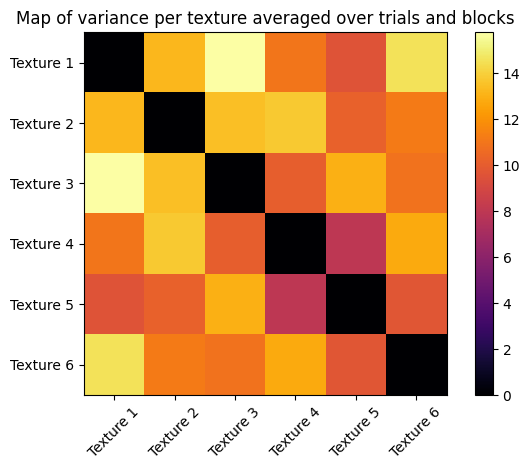

In [20]:
import matplotlib.pyplot as plt 

plt.imshow(matrix_variance_pairs[0][0],cmap="inferno")
plt.xticks([i for i in range(6)],["Texture "+str(i+1) for i in range(6)],rotation=45)
plt.yticks([i for i in range(6)],["Texture "+str(i+1) for i in range(6)])

plt.title("Map of variance per texture averaged over trials and blocks")
plt.colorbar()
plt.tight_layout()
plt.savefig("/its/home/drs25/3D-textures/assets/varianceMat.pdf")
plt.show()

In [21]:
print(np.abs(frames[0]-frames[1]).shape)
np.average(np.average(np.abs(frames[0]-frames[1]),axis=[1,2]))


(25, 192, 256)


np.float64(1.1607272038762195)

## Classification of various same blocks

In [6]:
import numpy as np 
import pandas as pd 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import cv2

In [2]:
def get_data(dataset,X,num=-1,augment=False,sobel=True):
    subset = dataset[((dataset['Printer'] == "bambu") & (dataset['Filament']=="plaminus") &(dataset['Pressure']=="p30")) ]
    subX, y = [], []
    for _, row in subset.iterrows():
        image=X[_][0]
        label=int(row['Pattern'].split(".")[0].replace("z", ""))
        if sobel:
            # Apply Sobel filter (on grayscale if not already)
            if len(image.shape) == 3:  # convert to grayscale if it's RGB
                roi_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            else:
                roi_gray = image

            sobelx = cv2.Sobel(roi_gray, cv2.CV_64F, 1, 0, ksize=3)
            sobely = cv2.Sobel(roi_gray, cv2.CV_64F, 0, 1, ksize=3)

            sobel_ = np.hypot(sobelx, sobely)  # magnitude
            image = cv2.convertScaleAbs(sobel_)  # scale back to uint8
        if num==-1:
            y.append(label)
            subX.append(image)
        else: 
            counter=int(row['Pattern'].split(".")[1])
            if counter==num:
                y.append(label)
                subX.append(image)
    subX,y=np.array(subX),np.array(y)
    if augment:
        noisy=subX+np.random.normal(0,5,subX.shape)
        #light=subX-10
        #dark=subX+10
        #light[light<0]=0
        #dark[dark>255]=255
        subX=np.concatenate([subX,noisy])
        y=np.concatenate([y,y])
    assert len(subX)==len(y) 
    return subX,y

def coral_align_target_to_source(Xs, Xt, eps=1e-6):
    # center
    mu_s = Xs.mean(axis=0, keepdims=True)
    mu_t = Xt.mean(axis=0, keepdims=True)
    Xs_c = Xs - mu_s
    Xt_c = Xt - mu_t

    # covariances with small ridge
    cov_s = np.cov(Xs_c, rowvar=False) + np.eye(Xs_c.shape[1]) * eps
    cov_t = np.cov(Xt_c, rowvar=False) + np.eye(Xt_c.shape[1]) * eps

    # matrix square-roots via SVD
    Us, Ss, _ = np.linalg.svd(cov_s)
    Ut, St, _ = np.linalg.svd(cov_t)
    # cov_s^{1/2} and cov_t^{-1/2}
    cov_s_sqrt = Us @ np.diag(np.sqrt(Ss)) @ Us.T
    cov_t_inv_sqrt = Ut @ np.diag(1.0/np.sqrt(St)) @ Ut.T

    # transform target: Xt_aligned = (Xt_c @ cov_t^{-1/2}) @ cov_s^{1/2} + mu_s
    Xt_aligned = (Xt_c @ cov_t_inv_sqrt) @ cov_s_sqrt + mu_s
    return Xt_aligned

In [7]:
#load in various datastes
#select everything that is bambu 
bambu_X=np.load("/mnt/data0/drs25/data/optical-tactile-dataset-for-textures/3DPrinted_same2.npy")
bambu_dataset=pd.read_csv("/its/home/drs25/3D-textures/Experimental/data/meta3DPrinted_same2.csv")
print("Dataset size:",bambu_X.shape)
print(len(bambu_dataset['Filament'].unique()),len(bambu_dataset['Printer'].unique()))
bambu_dataset = bambu_dataset.applymap(lambda s: s.lower() if isinstance(s, str) else s)

X=np.load("/mnt/data0/drs25/data/optical-tactile-dataset-for-textures/3DPrintedXgel.npy")
dataset=pd.read_csv("/its/home/drs25/3D-textures/Experimental/data/metagel.csv")
dataset = dataset.applymap(lambda s: s.lower() if isinstance(s, str) else s)

Dataset size: (1800, 1, 192, 256)
1 1


/tmp/ipykernel_1442986/1460015072.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  bambu_dataset = bambu_dataset.applymap(lambda s: s.lower() if isinstance(s, str) else s)
/tmp/ipykernel_1442986/1460015072.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset = dataset.applymap(lambda s: s.lower() if isinstance(s, str) else s)


#### with PCA

In [10]:

#X_,y_=get_data(dataset,X)
X_2,y_2=get_data(bambu_dataset,bambu_X,num=1,augment=True)
X_3,y_3=get_data(bambu_dataset,bambu_X)
#print(X_.shape,X_2.shape,X_3.shape,y_.shape,y_2.shape,y_3.shape)
#X_=X_.reshape((len(X_),-1))
X_2=X_2.reshape((len(X_2),-1))
X_3=X_3.reshape((len(X_3),-1))
print(X_2.shape,y_2.shape)
pca = PCA(n_components=25).fit(X_2)
Z_train = pca.transform(X_2)  # (N,3)
#Z_test = pca.transform(X_)
Z_test = pca.transform(X_3)
#Z_test = np.concatenate([Z_test,Z_test2])
y_=y_3
#Z_test=coral_align_target_to_source(Z_train, Z_test)
#selet just one and train classifier
acc=np.zeros((20))
train=np.zeros((20))
test=np.zeros((20))
for i in range(20):
    clf = RandomForestClassifier(max_depth=50, random_state=np.random.randint(0,100))
    train_X, test_X, train_y, test_y = train_test_split(Z_train,y_2)
    clf.fit(train_X, train_y)
    y_pred = clf.predict(train_X)
    accuracy = accuracy_score(train_y, y_pred)
    train[i]=accuracy*100
    y_pred = clf.predict(test_X)
    accuracy = accuracy_score(test_y, y_pred)
    test[i]=accuracy*100
    # select all the others and test classifier
    y_pred = clf.predict(Z_test)
    accuracy = accuracy_score(y_, y_pred)
    acc[i]=accuracy*100
print("Other",np.mean(acc), "%",np.std(acc))
print("Train",np.mean(train), "%",np.std(train))
print("Test",np.mean(test), "%",np.std(test))

(600, 49152) (600,)
Other 63.98888888888888 % 1.6703293088490057
Train 100.0 % 0.0
Test 99.80000000000001 % 0.47609522856952163


#### vis

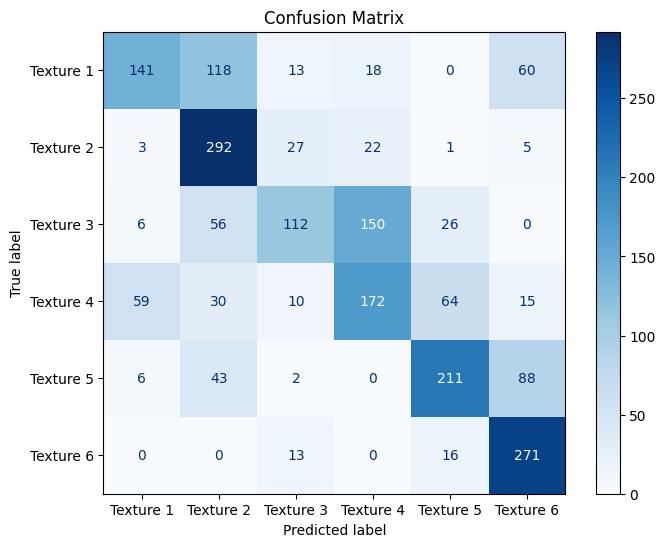

In [112]:
cm = confusion_matrix(y_, y_pred, labels=np.unique(y_))
class_labels = ["Texture "+str(i+1) for i in np.unique(y_)]

# plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax, cmap="Blues", colorbar=True)
plt.title("Confusion Matrix")
plt.savefig("/its/home/drs25/3D-textures/assets/confusion_RFC_samePF.pdf")
plt.show()

### ANN

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import gc
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SimpleANN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleANN, self).__init__()
        # Input layer to hidden layer
        self.fc1 = nn.Linear(input_size, hidden_size)
        # Hidden layer to hidden layer (optional)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        # Hidden layer to output layer
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
    def forward(self, x):
        # Apply ReLU activation for hidden layers
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        # Output layer (no activation if using CrossEntropyLoss)
        x = self.fc3(x)
        return x

def train_model(train_X, train_y, test_X, test_y, params, epochs=100, batch_size=32,arch=None,):
    # Permute to (N, C, H, W)
    # Convert to torch tensors
    train_X = torch.tensor(train_X, dtype=torch.float32)
    test_X = torch.tensor(test_X, dtype=torch.float32)
    train_y = torch.tensor(train_y)
    test_y = torch.tensor(test_y)

    train_dataset = TensorDataset(train_X, train_y)
    test_dataset = TensorDataset(test_X, test_y)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    model = arch(*params).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    for epoch in range(epochs):
        #model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            X_batch=X_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch.to(device))
            loss.backward()
            optimizer.step()
            torch.cuda.empty_cache()
        if epoch%500==0: print("Epoch",epoch," loss:",loss.item())

    # Evaluate
    def evaluate(loader):
        model.eval()
        correct, total, running_loss = 0, 0, 0.0
        with torch.no_grad():
            for X_batch, y_batch in loader:
                outputs = model(X_batch.to(device))
                loss = criterion(outputs, y_batch.to(device))
                running_loss += loss.item()
                predicted = torch.argmax(outputs.cpu(), axis=1)
                correct += (predicted == torch.argmax(y_batch, axis=1)).sum().item()
                total += y_batch.size(0)
        return running_loss / len(loader), correct / total

    test_loss, test_acc = evaluate(test_loader)
    train_loss, train_acc = evaluate(train_loader)
    return model, train_acc, test_acc

# ------------------------------------------------------------------
# Dataset splitting helpers
# ------------------------------------------------------------------


def get_y(y, num_classes):
    unique_labels = np.arange(num_classes)
    label_map = {label: i for i, label in enumerate(unique_labels)}
    y_mapped = np.array([label_map.get(l, -1) for l in y])
    y_cat = np.eye(num_classes)[y_mapped]
    return y_cat


In [22]:
from sklearn.decomposition import PCA

#X_,y_=get_data(dataset,X)
X_2,y_2=get_data(bambu_dataset,bambu_X,num=1,augment=True)
X_3,y_3=get_data(bambu_dataset,bambu_X)
#print(X_.shape,X_2.shape,X_3.shape,y_.shape,y_2.shape,y_3.shape)
#X_=X_.reshape((len(X_),-1))
X_2=X_2.reshape((len(X_2),-1))
X_3=X_3.reshape((len(X_3),-1))
#print(X_.shape,X_2.shape,y_.shape,y_2.shape)
pca = PCA(n_components=45).fit(X_2)
Z_train = pca.transform(X_2)  # (N,3)
#Z_test = pca.transform(X_)
Z_test = pca.transform(X_3)
#Z_test = np.concatenate([Z_test,Z_test2])
y_=y_3#np.concatenate([y_,y_3])

acc=[]
for i in range(20):
    #train_X, test_X, train_y, test_y = train_test_split(Z_train.astype('float32'), y_2, test_size=0.2, random_state=np.random.randint(0,100))
    mean_train = Z_train.mean(axis=0)
    mean_other = Z_test.mean(axis=0)
    #Z_test = Z_test - (mean_other - mean_train)
    Z_train=(Z_train-np.min(Z_train))/(np.max(Z_train)-np.min(Z_train))
    Z_test=(Z_test-np.min(Z_test))/(np.max(Z_test)-np.min(Z_test))
    model, train_acc, test_acc = model, train_acc, test_acc = train_model(
                                Z_train.astype('float32'), get_y(y_2,6), Z_test.astype('float32'), get_y(y_,6), (Z_train.shape[1],50,6), epochs=15000,batch_size=64, arch=SimpleANN)
    torch.cuda.empty_cache()
    acc.append([train_acc,test_acc])   
    print("Running avg:",np.average(np.array(acc),axis=0))  
acc=np.array(acc)
np.save("/its/home/drs25/3D-textures/Experimental/data/ANN_bambu_e15000",acc)   
print(np.average(acc,axis=0))  

Epoch 0  loss: 1.8240162978569665
Epoch 500  loss: 0.013144910206236204
Epoch 1000  loss: 0.00116537423311532
Epoch 1500  loss: 0.00028851174874825836
Epoch 2000  loss: 9.606755904882172e-05
Epoch 2500  loss: 0.0001929938960533543
Epoch 3000  loss: 5.928325648222691e-05
Epoch 3500  loss: 1.232280051066681e-05
Epoch 4000  loss: 1.8043554717313743e-05
Epoch 4500  loss: 1.4348863112800814e-05
Epoch 5000  loss: 2.553046001274595e-06
Epoch 5500  loss: 4.839688463764702e-05
Epoch 6000  loss: 6.089515247313196e-06
Epoch 6500  loss: 2.9404683017375532e-06
Epoch 7000  loss: 2.8461061699995107e-06
Epoch 7500  loss: 1.092749036738875e-06
Epoch 8000  loss: 1.1970570792385615e-06
Epoch 8500  loss: 3.5266030421846984e-07
Epoch 9000  loss: 3.0348104393951303e-06
Epoch 9500  loss: 2.2102998773476656e-06
Epoch 10000  loss: 3.029896419685466e-07
Epoch 10500  loss: 7.947260150705422e-07
Epoch 11000  loss: 1.3112938459514112e-06
Epoch 11500  loss: 1.4603052944650585e-06
Epoch 12000  loss: 3.37759266481422

In [20]:
print(np.average(acc,axis=0))  

[1.         0.52416667]
